# **IMAGE COMPRESSION USING SINGULAR VALUE DECOMPOSITION**
**NAME**:Daniel Kofi Godwin Kondo\
**Course:** Introduction To Machine Learning (ML)\
**Semester 1:** Linear Algebra


In [113]:
import requests
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 

In [9]:
# defined the image URL
url= 'https://media.geeksforgeeks.org/wp-content/cdn-uploads/20210401173418/Webp-compressed.jpg'

# Downloading the image
response= requests.get(url, stream=True)

# Storing the image Localy (wb = binary write mode)
with open('image.png', 'wb') as f:
    f.write(response.content)

# Reading the image with open cv
img= cv2.imread('image.png')

#Converting the image into gray scale for faster computation
gray_image= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Calculating the SVD using the np.linalg.svd() method
u, s, v= np.linalg.svd(gray_image, full_matrices= False)

# Inspectiong of the shape of the matrices
print(f'u.shape:{u.shape}, s.shape{s.shape}, v.shape{v.shape}')


u.shape:(3648, 3648), s.shape(3648,), v.shape(3648, 5472)


From the shape of the left and right eigenvector u, v and the singular value s the number of linearly independent eigenvectors are 3648

variance explained of top: 30 singular value 
 [9.9795e-01 7.4000e-04 3.8900e-04 3.0500e-04 1.0600e-04 7.4000e-05
 5.7000e-05 3.9000e-05 3.1000e-05 2.6000e-05 2.2000e-05 1.9000e-05
 1.5000e-05 1.4000e-05 1.1000e-05 9.0000e-06 9.0000e-06 7.0000e-06
 7.0000e-06 6.0000e-06 5.0000e-06 5.0000e-06 5.0000e-06 4.0000e-06
 4.0000e-06 4.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06 3.0000e-06]
variance explained of top: 20 singular value 
 [9.9795e-01 7.4000e-04 3.8900e-04 3.0500e-04 1.0600e-04 7.4000e-05
 5.7000e-05 3.9000e-05 3.1000e-05 2.6000e-05 2.2000e-05 1.9000e-05
 1.5000e-05 1.4000e-05 1.1000e-05 9.0000e-06 9.0000e-06 7.0000e-06
 7.0000e-06 6.0000e-06]
variance explained of top: 10 singular value 
 [9.9795e-01 7.4000e-04 3.8900e-04 3.0500e-04 1.0600e-04 7.4000e-05
 5.7000e-05 3.9000e-05 3.1000e-05 2.6000e-05]
variance explained of top: 5 singular value 
 [9.9795e-01 7.4000e-04 3.8900e-04 3.0500e-04 1.0600e-04]


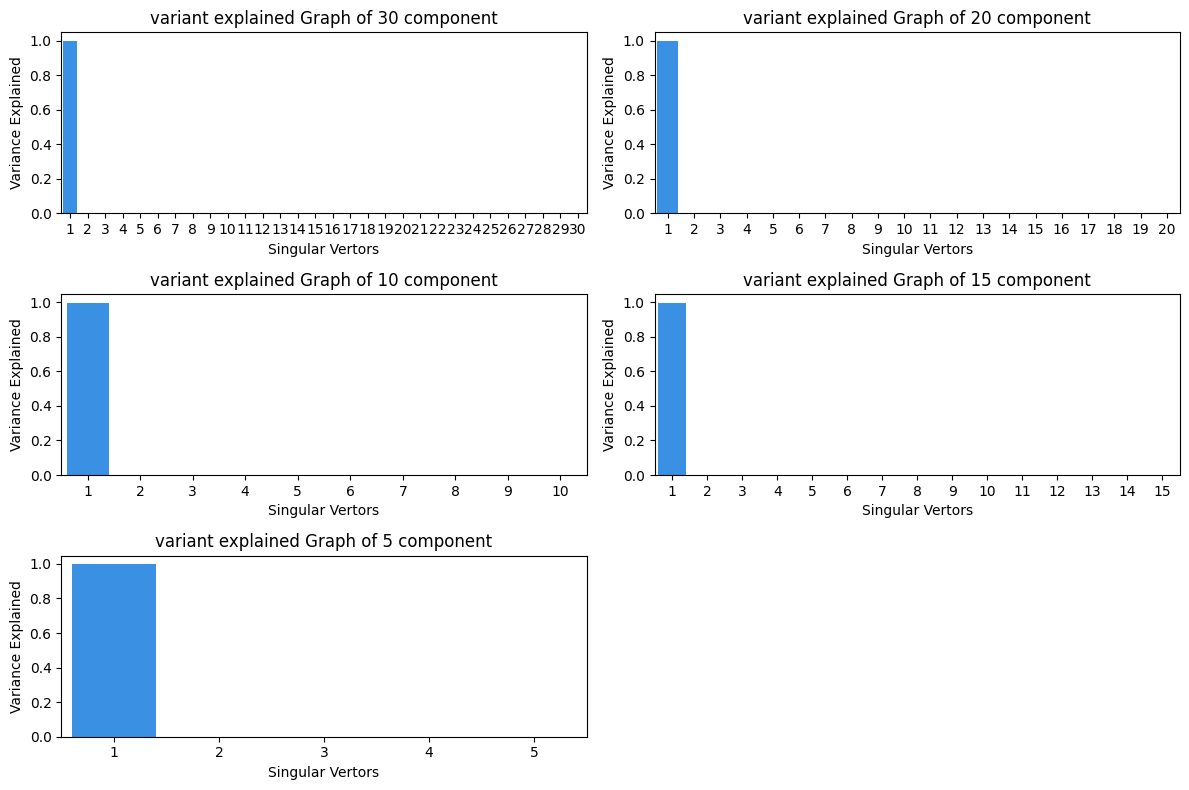

In [76]:
'''
lets determing the variance explained which shows us 
how many component of the singular value matrix is needed to keep 
'''
import seaborn as sns
var_explained = np.round(s**2/np.sum(s**2), decimals= 6)

# variance explained top singular vectors 
k= 30
print(f'variance explained of top: {k} singular value \n {var_explained[0:k]}')
k= 20
print(f'variance explained of top: {k} singular value \n {var_explained[0:k]}')
k= 10
print(f'variance explained of top: {k} singular value \n {var_explained[0:k]}')
k= 5
print(f'variance explained of top: {k} singular value \n {var_explained[0:k]}')

#Ploting
k_values= [30, 20, 10, 15, 5]
plt.figure(figsize=(12,8))
for i in range(len(k_values)):
    k= k_values[i]
    plt.subplot(3,2,i+1)
    sns.barplot(x= list(range(1,k+1)), y= var_explained[0:k], color= "dodgerblue")
    plt.title(f'variant explained Graph of {k} component')
    plt.xlabel('Singular Vertors')
    plt.ylabel('Variance Explained')    
plt.tight_layout()
plt.show()







# Remark
The variable explained shows how much total features (information) is capture by a component or sigular value from the plots we observed that the first singular vector captures the overall majority of the variance (total information) in the grayscale image. This indicates strong redundancy and low-rank structure in the image data, meaning that only a small number of singular values are required for accurate reconstruction.

<function matplotlib.pyplot.show(close=None, block=None)>

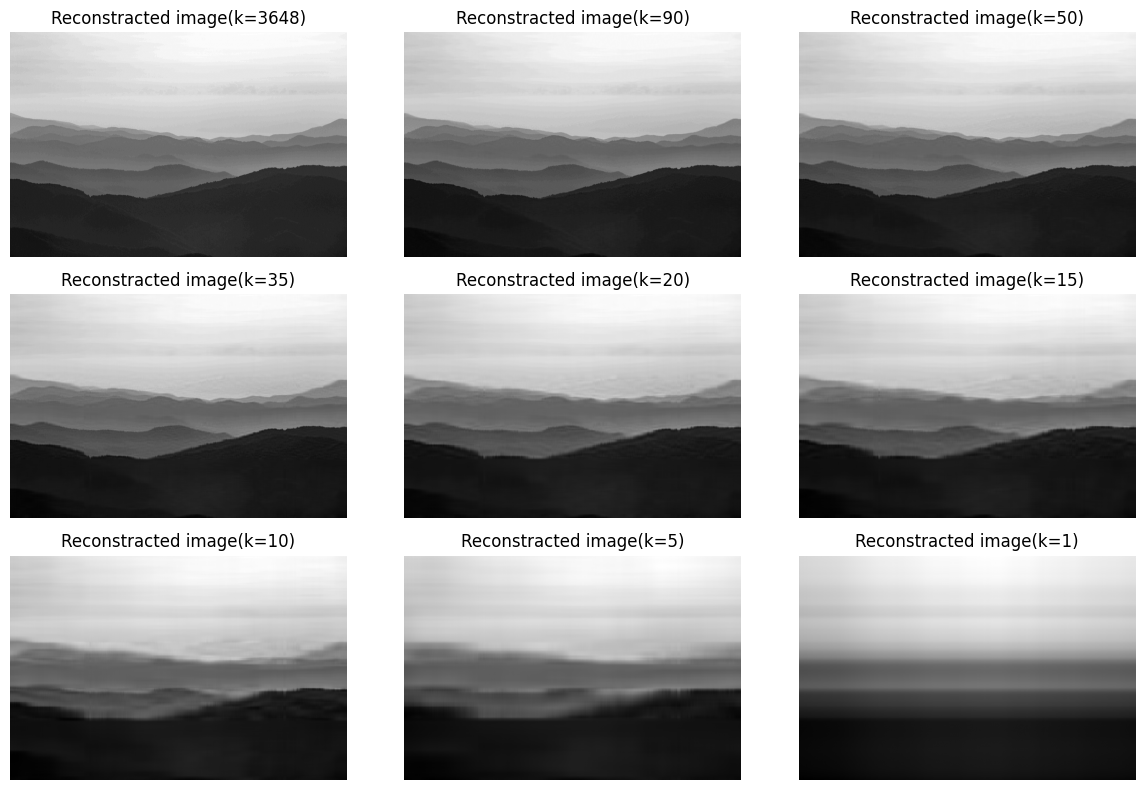

In [77]:
# reconstruct with k components
k_values= [3648,90, 50, 35, 20, 15, 10, 5, 1]
approximation= []
for k in k_values:
    approx= u[:,:k]@ np.diag(s[:k])@ v[:k,:]
    approximation.append(approx)

plt.figure(figsize=(12,8))
for i, approx in enumerate(approximation):
    plt.subplot(3,3,i+1)
    plt.imshow(approx, cmap= 'gray')
    plt.title(f'Reconstracted image(k={k_values[i]})')
    plt.axis('off')
plt.tight_layout()
plt.show


In [78]:
# Calculate metrics 
error= []
k_values= [90, 50, 35, 20, 15, 10, 5, 1]
m, n=gray_image.shape 
comp_ratios= []
for k in k_values:
    #Low_rank approximation
    approx= u[:,:k]@ np.diag(s[:k])@ v[:k,:]
    #relative reconstruction 
    rel_errors= np.linalg.norm(gray_image - approx)/np.linalg.norm(gray_image)
    error.append(rel_errors)
    #compression reatio 
    comp_ratio= (k* (m+n+1))/(m*n)
    comp_ratios.append(comp_ratio)
    # printing results 
    for n in error:
        print(f'\n Releative Error of (k={k}): {rel_errors:.4f} ({rel_errors*100:.2f}%)')
        print(f'\n Compression Rario of (k={k}): {comp_ratio: .4f}')
        print(f'\n Retained(k={k}) of {min(m, n)} singular values')


 Releative Error of (k=90): 0.0081 (0.81%)

 Compression Rario of (k=90):  0.0411

 Retained(k=90) of 0.008111496992105787 singular values

 Releative Error of (k=50): 0.0095 (0.95%)

 Compression Rario of (k=50):  6165.7937

 Retained(k=50) of 0.008111496992105787 singular values

 Releative Error of (k=50): 0.0095 (0.95%)

 Compression Rario of (k=50):  6165.7937

 Retained(k=50) of 0.009522656899742906 singular values

 Releative Error of (k=35): 0.0106 (1.06%)

 Compression Rario of (k=35):  3676.4619

 Retained(k=35) of 0.008111496992105787 singular values

 Releative Error of (k=35): 0.0106 (1.06%)

 Compression Rario of (k=35):  3676.4619

 Retained(k=35) of 0.009522656899742906 singular values

 Releative Error of (k=35): 0.0106 (1.06%)

 Compression Rario of (k=35):  3676.4619

 Retained(k=35) of 0.010577843570807604 singular values

 Releative Error of (k=20): 0.0128 (1.28%)

 Compression Rario of (k=20):  1891.2683

 Retained(k=20) of 0.008111496992105787 singular values

 

# CONCLUSION :
To sum up by low-rank approximation we obtained a good approximation close to 15 components.

## **Part 2 : SVD on higher Rank Image**

In [122]:
from io import BytesIO
# defined the image URL
url= 'https://media.istockphoto.com/id/1487503057/photo/old-panorama-vintage-red-brick-wall-for-background-and-texture.jpg?s=1024x1024&w=is&k=20&c=UcfKdMF_EjB8df8U6eGJLPZCPZGjql6FVkuWoGqWgZw='

# Downloading the image
response= requests.get(url, stream=True)

# Storing the image Localy (wb = binary write mode)
img_pil= Image.open(BytesIO(response.content))

#Converting the image into gray scale for faster computation
gray_image= np.array(img_pil.convert('L'))
print(gray_image)

#Calculating the SVD using the np.linalg.svd() method
u, s, v= np.linalg.svd(gray_image, full_matrices= False)

# Inspectiong of the shape of the matrices
print(f'u.shape:{u.shape}, s.shape{s.shape}, v.shape{v.shape}')


[[ 62  63  68 ...  13  23  31]
 [ 58  60  57 ...   6   8  11]
 [  5   4   5 ...   5   1   1]
 ...
 [ 65  63  63 ...  88  98  95]
 [ 51  57  69 ...  87  93  87]
 [ 51  57  69 ... 142 149 143]]
u.shape:(682, 682), s.shape(682,), v.shape(682, 1024)


variance explained of top: 30 singular value 
 [0.824742 0.002814 0.002655 0.002593 0.002518 0.002387 0.002257 0.002254
 0.002211 0.002147 0.002085 0.002007 0.001968 0.001889 0.001862 0.001847
 0.001797 0.001772 0.001728 0.001721 0.001703 0.001666 0.001626 0.001608
 0.001586 0.001571 0.001544 0.001487 0.001479 0.001462]
variance explained of top: 20 singular value 
 [0.824742 0.002814 0.002655 0.002593 0.002518 0.002387 0.002257 0.002254
 0.002211 0.002147 0.002085 0.002007 0.001968 0.001889 0.001862 0.001847
 0.001797 0.001772 0.001728 0.001721]
variance explained of top: 10 singular value 
 [0.824742 0.002814 0.002655 0.002593 0.002518 0.002387 0.002257 0.002254
 0.002211 0.002147]
variance explained of top: 5 singular value 
 [0.824742 0.002814 0.002655 0.002593 0.002518]


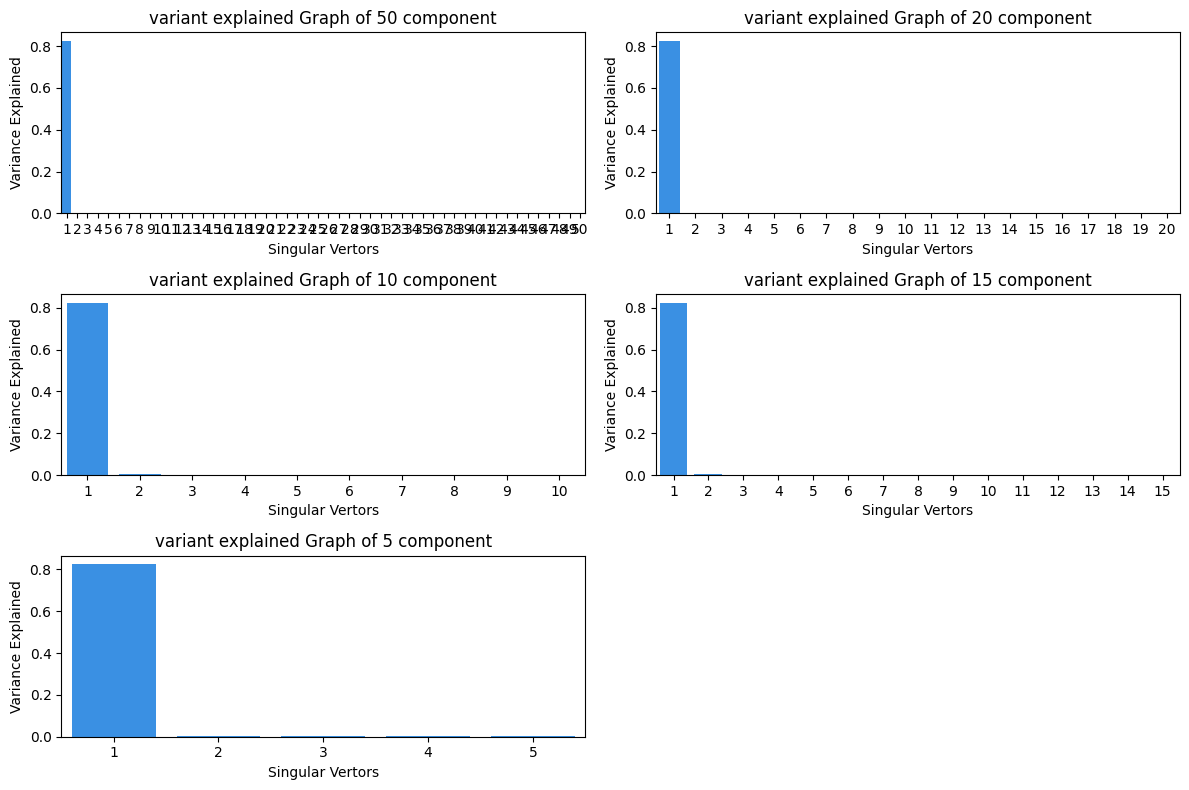

In [123]:
'''
lets determing the variance explained which shows us 
how many component of the singular value matrix is needed to keep 
'''
import seaborn as sns
var_explained = np.round(S**2/np.sum(S**2), decimals= 6)

# variance explained top singular vectors 
k= 30
print(f'variance explained of top: {k} singular value \n {var_explained[0:k]}')
k= 20
print(f'variance explained of top: {k} singular value \n {var_explained[0:k]}')
k= 10
print(f'variance explained of top: {k} singular value \n {var_explained[0:k]}')
k= 5
print(f'variance explained of top: {k} singular value \n {var_explained[0:k]}')

#Ploting
k_values= [50, 20, 10, 15, 5]
plt.figure(figsize=(12,8))
for i in range(len(k_values)):
    k= k_values[i]
    plt.subplot(3,2,i+1)
    sns.barplot(x= list(range(1,k+1)), y= var_explained[0:k], color= "dodgerblue")
    plt.title(f'variant explained Graph of {k} component')
    plt.xlabel('Singular Vertors')
    plt.ylabel('Variance Explained')    
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

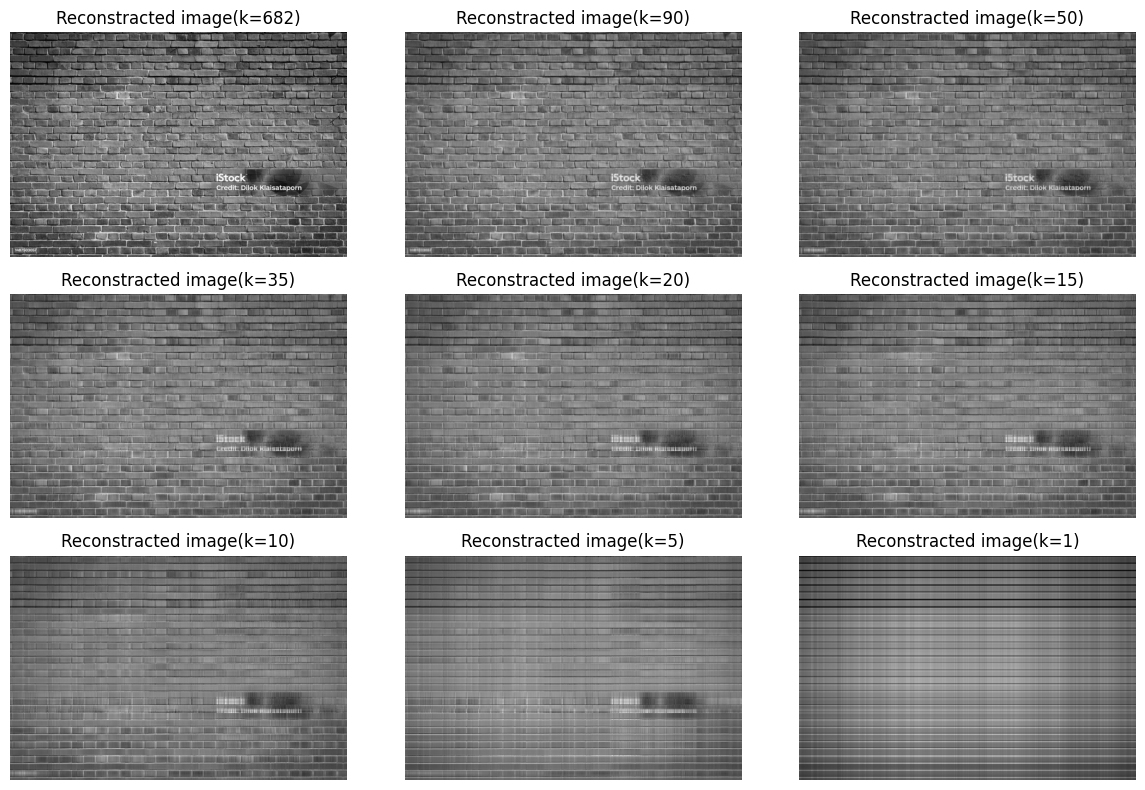

In [124]:
# reconstruct with k components
k_values= [682,90, 50, 35, 20, 15, 10, 5, 1]
approximation= []
for k in k_values:
    approx= u[:,:k]@ np.diag(s[:k])@ v[:k,:]
    approximation.append(approx)

plt.figure(figsize=(12,8))
for i, approx in enumerate(approximation):
    plt.subplot(3,3,i+1)
    plt.imshow(approx, cmap= 'gray')
    plt.title(f'Reconstracted image(k={k_values[i]})')
    plt.axis('off')
plt.tight_layout()
plt.show

# CONCLUSION :
To sum up by low-rank approximation we obtained a good approximation close to 35 components.